In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
df = pd.read_csv('career_pred.csv')
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [5]:
column_names = df.columns
column_names

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

In [6]:
for i in column_names:
    if df[i].dtype != type(1):
        df[i],class_labels = pd.factorize(df[i])
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,0,0,0,0,0,0,0,0,0,0
1,78,62,73,60,71,70,73,84,91,12,...,1,0,1,1,1,0,0,1,1,1
2,71,86,91,87,61,81,72,72,94,11,...,2,1,0,0,0,1,0,1,1,1
3,76,87,60,84,89,73,62,88,69,7,...,3,1,1,1,0,1,1,0,1,2
4,92,62,90,67,71,89,73,71,73,4,...,4,0,0,0,0,1,0,0,1,3


In [7]:
X = df.drop('Suggested Job Role',axis='columns')
y = df['Suggested Job Role']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =1)

In [13]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(38,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [14]:
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error loss for regression
              metrics=['mae']) 

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
400/400 [==============================] - 0s 844us/step - loss: 114.8968 - mae: 8.9239 - val_loss: 94.6918 - val_mae: 8.3692
Epoch 2/100
400/400 [==============================] - 0s 651us/step - loss: 98.6106 - mae: 8.4928 - val_loss: 97.5535 - val_mae: 8.5141
Epoch 3/100
400/400 [==============================] - 0s 647us/step - loss: 98.6681 - mae: 8.4887 - val_loss: 95.7644 - val_mae: 8.3758
Epoch 4/100
400/400 [==============================] - 0s 647us/step - loss: 97.1612 - mae: 8.4614 - val_loss: 96.8507 - val_mae: 8.4946
Epoch 5/100
400/400 [==============================] - 0s 660us/step - loss: 97.2237 - mae: 8.4605 - val_loss: 94.6942 - val_mae: 8.3988
Epoch 6/100
400/400 [==============================] - 0s 642us/step - loss: 96.6945 - mae: 8.4432 - val_loss: 94.7134 - val_mae: 8.3969
Epoch 7/100
400/400 [==============================] - 0s 650us/step - loss: 96.3774 - mae: 8.4196 - val_loss: 95.6409 - val_mae: 8.4447
Epoch 8/100
400/400 [===================

In [34]:
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)
predictions = (predictions.astype(int))
len(X_test)

125/125 [==============================] - 0s 378us/step


4000

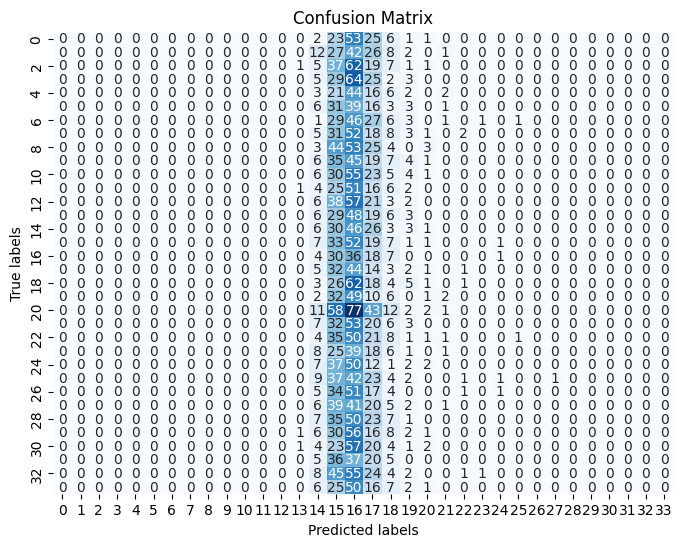

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()